### INSAT-3D Sounder data analysis

Sounder Level2 data for A1 sector

Documentation: https://dx.doi.org/10.19038/SAC/10/3RSND_L2B_SA1

In [1]:
#Import libraries 
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib as mpl
import numpy as np

In [2]:
# Load INSAT-3DR data file
data = xr.open_mfdataset(r'E:\INSAT_3D_R\INSAT-3DR\INSAT-3DR Jan 2021\Jan 2021\3RSND*.h5',
                         concat_dim='time',combine='nested', engine="h5netcdf")
data

<xarray.Dataset>
Dimensions:               (time: 589, GeoY: 320, GeoX: 384, plevels: 40,
                           GeoY1: 80)
Coordinates:
  * GeoX                  (GeoX) int32 0 1 2 3 4 5 6 ... 378 379 380 381 382 383
  * GeoY                  (GeoY) int32 0 1 2 3 4 5 6 ... 314 315 316 317 318 319
  * GeoY1                 (GeoY1) int32 0 1 2 3 4 5 6 7 ... 73 74 75 76 77 78 79
    Latitude              (time, GeoY, GeoX) float32 dask.array<chunksize=(1, 320, 384), meta=np.ndarray>
    Longitude             (time, GeoY, GeoX) float32 dask.array<chunksize=(1, 320, 384), meta=np.ndarray>
  * plevels               (plevels) float32 0.1 0.2 0.5 ... 920.0 950.0 1e+03
  * time                  (time) datetime64[ns] 2021-01-01 ... 2021-01-31T22:...
Data variables: (12/51)
    CLD_FLG               (time, GeoY, GeoX) float32 dask.array<chunksize=(1, 320, 384), meta=np.ndarray>
    CLR_PIX               (time, GeoY, GeoX) float32 dask.array<chunksize=(1, 320, 384), meta=np.ndarray>
    CLR_SKY_BT1           (time, GeoY, GeoX) float32 dask.array<chunksize=(1, 320, 384), meta=np.ndarray>
    CLR_SKY_BT10          (time, GeoY, GeoX) float32 dask.array<chunksize=(1, 320, 384), meta=np.ndarray>
    CLR_SKY_BT11          (time, GeoY, GeoX) float32 dask.array<chunksize=(1, 320, 384), meta=np.ndarray>
    CLR_SKY_BT12          (time, GeoY, GeoX) float32 dask.array<chunksize=(1, 320, 384), meta=np.ndarray>
    ...                    ...
    TSurfReg              (time, GeoY, GeoX) float32 dask.array<chunksize=(1, 320, 384), meta=np.ndarray>
    WI                    (time, GeoY, GeoX) float32 dask.array<chunksize=(1, 320, 384), meta=np.ndarray>
    theta-e               (time, GeoY, GeoX) float32 dask.array<chunksize=(1, 320, 384), meta=np.ndarray>
    totH2O                (time, GeoY, GeoX) float32 dask.array<chunksize=(1, 320, 384), meta=np.ndarray>
    totO3Phy              (time, GeoY, GeoX) float32 dask.array<chunksize=(1, 320, 384), meta=np.ndarray>
    totO3Reg              (time, GeoY, GeoX) float32 dask.array<chunksize=(1, 320, 384), meta=np.ndarray>
Attributes: (12/26)
    Acquisition_Date:                                               01JAN2021
    Acquisition_End_Time:                                           01-JAN-20...
    Acquisition_Start_Time:                                         01-JAN-20...
    Acquisition_Time_in_GMT:                                        0000
    Ground_Station:                                                 BES,SAC/I...
    HDF_Product_File_Name:                                          3RSND_01J...
    ...                                                             ...
    left_longitude:                                                 51.869473
    lower_latitude:                                                 6.986622
    right_longitude:                                                102.10781
    source:                                                         BES,SAC/I...
    title:                                                          3RSND_01J...
    upper_latitude:                                                 41.471855

In [4]:
# Multiplying factor to Latitude and Longitude 
data.assign_coords(Longitude=(data.Longitude *0.01))
data.assign_coords(Latitude=(data.Latitude *0.01))
data

<xarray.Dataset>
Dimensions:               (time: 589, GeoY: 320, GeoX: 384, plevels: 40,
                           GeoY1: 80)
Coordinates:
  * GeoX                  (GeoX) int32 0 1 2 3 4 5 6 ... 378 379 380 381 382 383
  * GeoY                  (GeoY) int32 0 1 2 3 4 5 6 ... 314 315 316 317 318 319
  * GeoY1                 (GeoY1) int32 0 1 2 3 4 5 6 7 ... 73 74 75 76 77 78 79
    Latitude              (time, GeoY, GeoX) float32 dask.array<chunksize=(1, 320, 384), meta=np.ndarray>
    Longitude             (time, GeoY, GeoX) float32 dask.array<chunksize=(1, 320, 384), meta=np.ndarray>
  * plevels               (plevels) float32 0.1 0.2 0.5 ... 920.0 950.0 1e+03
  * time                  (time) datetime64[ns] 2021-01-01 ... 2021-01-31T22:...
Data variables: (12/51)
    CLD_FLG               (time, GeoY, GeoX) float32 dask.array<chunksize=(1, 320, 384), meta=np.ndarray>
    CLR_PIX               (time, GeoY, GeoX) float32 dask.array<chunksize=(1, 320, 384), meta=np.ndarray>
    CLR_SKY_BT1           (time, GeoY, GeoX) float32 dask.array<chunksize=(1, 320, 384), meta=np.ndarray>
    CLR_SKY_BT10          (time, GeoY, GeoX) float32 dask.array<chunksize=(1, 320, 384), meta=np.ndarray>
    CLR_SKY_BT11          (time, GeoY, GeoX) float32 dask.array<chunksize=(1, 320, 384), meta=np.ndarray>
    CLR_SKY_BT12          (time, GeoY, GeoX) float32 dask.array<chunksize=(1, 320, 384), meta=np.ndarray>
    ...                    ...
    TSurfReg              (time, GeoY, GeoX) float32 dask.array<chunksize=(1, 320, 384), meta=np.ndarray>
    WI                    (time, GeoY, GeoX) float32 dask.array<chunksize=(1, 320, 384), meta=np.ndarray>
    theta-e               (time, GeoY, GeoX) float32 dask.array<chunksize=(1, 320, 384), meta=np.ndarray>
    totH2O                (time, GeoY, GeoX) float32 dask.array<chunksize=(1, 320, 384), meta=np.ndarray>
    totO3Phy              (time, GeoY, GeoX) float32 dask.array<chunksize=(1, 320, 384), meta=np.ndarray>
    totO3Reg              (time, GeoY, GeoX) float32 dask.array<chunksize=(1, 320, 384), meta=np.ndarray>
Attributes: (12/26)
    Acquisition_Date:                                               01JAN2021
    Acquisition_End_Time:                                           01-JAN-20...
    Acquisition_Start_Time:                                         01-JAN-20...
    Acquisition_Time_in_GMT:                                        0000
    Ground_Station:                                                 BES,SAC/I...
    HDF_Product_File_Name:                                          3RSND_01J...
    ...                                                             ...
    left_longitude:                                                 51.869473
    lower_latitude:                                                 6.986622
    right_longitude:                                                102.10781
    source:                                                         BES,SAC/I...
    title:                                                          3RSND_01J...
    upper_latitude:                                                 41.471855

### Subsetting over an area of interest 

In [5]:
# clipping the data between the area Mahabaleshwar/Coordinates  17.9307° N, 73.6477° E
min_lon = 73.0
min_lat = 17 
max_lon = 74.0
max_lat = 18

da1 = data.H2OMMRPhy.where((data.Latitude > min_lat).compute() & (data.Latitude < max_lat).compute(), drop=True)
da2 = da1.where((da1.Longitude > min_lon).compute() & (da1.Longitude < max_lon).compute(), drop=True)
da2

<xarray.DataArray 'H2OMMRPhy' (time: 589, plevels: 40, GeoY: 15, GeoX: 15)>
dask.array<where, shape=(589, 40, 15, 15), dtype=float32, chunksize=(1, 40, 15, 15), chunktype=numpy.ndarray>
Coordinates:
  * GeoX       (GeoX) int32 158 159 160 161 162 163 ... 167 168 169 170 171 172
  * GeoY       (GeoY) int32 199 200 201 202 203 204 ... 208 209 210 211 212 213
    Latitude   (time, GeoY, GeoX) float32 18.26 18.26 18.26 ... 16.9 16.9 16.9
    Longitude  (time, GeoY, GeoX) float32 72.66 72.76 72.85 ... 73.81 73.9 73.99
  * plevels    (plevels) float32 0.1 0.2 0.5 1.0 1.5 ... 850.0 920.0 950.0 1e+03
  * time       (time) datetime64[ns] 2021-01-01 ... 2021-01-31T22:00:00
Attributes:
    long_name:  Humidity Profiles(Phy)
    units:      g/kg

### Spatial mean

In [6]:
data_mean = da2.mean(dim=['GeoX','GeoY'], skipna=True)
data_mean

<xarray.DataArray 'H2OMMRPhy' (time: 589, plevels: 40)>
dask.array<mean_agg-aggregate, shape=(589, 40), dtype=float32, chunksize=(1, 40), chunktype=numpy.ndarray>
Coordinates:
  * plevels  (plevels) float32 0.1 0.2 0.5 1.0 1.5 ... 850.0 920.0 950.0 1e+03
  * time     (time) datetime64[ns] 2021-01-01 ... 2021-01-31T22:00:00

### Transpose

In [7]:
data_transpose = data_mean.transpose()
data_transpose

<xarray.DataArray 'H2OMMRPhy' (plevels: 40, time: 589)>
dask.array<transpose, shape=(40, 589), dtype=float32, chunksize=(40, 1), chunktype=numpy.ndarray>
Coordinates:
  * plevels  (plevels) float32 0.1 0.2 0.5 1.0 1.5 ... 850.0 920.0 950.0 1e+03
  * time     (time) datetime64[ns] 2021-01-01 ... 2021-01-31T22:00:00

### Xarray to dataframe

In [8]:
dataf = pd.DataFrame(data_mean.to_numpy(),
                     # index=data_transpose.time, 
                     columns=data_transpose.plevels)
dataf['Date_Time'] = data_transpose.time
dataf

,0.1,0.2,0.5,1.0,1.5,2.0,3.0,4.0,5.0,7.0,...,570.0,620.0,670.0,700.0,780.0,850.0,920.0,950.0,1000.0,Date_Time
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.555928,2.959961,4.854353,6.078710,10.179461,11.623616,11.581803,11.253095,11.448889,2021-01-01 00:00:00
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.551404,2.956183,4.846501,6.054878,10.157735,11.580788,11.615959,11.358342,11.484736,2021-01-01 01:00:00
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.227961,3.552530,4.782306,5.672829,9.525791,11.627701,12.291488,12.284659,12.255200,2021-01-01 02:00:00
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.297225,3.573849,4.808873,5.705846,9.563935,11.641072,12.275180,12.219690,12.275713,2021-01-01 03:00:00
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.827876,3.912995,5.094662,6.062737,9.420252,12.030429,12.469334,12.496915,13.062437,2021-01-01 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.254391,0.360376,1.534635,3.054654,5.699397,6.153798,6.338227,6.805899,10.336297,2021-01-31 18:00:00
585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.255776,0.385872,1.590702,3.104000,5.686332,6.211289,6.333891,6.807541,10.199230,2021-01-31 19:00:00
586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.254041,0.381048,1.604025,3.189806,5.590785,5.981908,6.262059,6.593110,9.846551,2021-01-31 20:00:00
587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.253762,0.378076,1.611950,3.213344,5.594185,5.988103,6.265197,6.586113,9.710938,2021-01-31 21:00:00


### Create an empty Dataframe of Hours and Dates

In [9]:
time_df = pd.date_range(start='1/1/2021', end='2/1/2021', freq='h')

In [10]:
tr = pd.DataFrame()
tr['Date_Time'] = time_df
tr

,Date_Time
0,2021-01-01 00:00:00
1,2021-01-01 01:00:00
2,2021-01-01 02:00:00
3,2021-01-01 03:00:00
4,2021-01-01 04:00:00
...,...
740,2021-01-31 20:00:00
741,2021-01-31 21:00:00
742,2021-01-31 22:00:00
743,2021-01-31 23:00:00


### Merge the data to empty dataframe to get missing dates

In [11]:
new_data = dataf.merge(tr, on = ['Date_Time'],how='right')
new_data

,0.1,0.2,0.5,1.0,1.5,2.0,3.0,4.0,5.0,7.0,...,570.0,620.0,670.0,700.0,780.0,850.0,920.0,950.0,1000.0,Date_Time
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.555928,2.959961,4.854353,6.078710,10.179461,11.623616,11.581803,11.253095,11.448889,2021-01-01 00:00:00
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.551404,2.956183,4.846501,6.054878,10.157735,11.580788,11.615959,11.358342,11.484736,2021-01-01 01:00:00
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.227961,3.552530,4.782306,5.672829,9.525791,11.627701,12.291488,12.284659,12.255200,2021-01-01 02:00:00
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.297225,3.573849,4.808873,5.705846,9.563935,11.641072,12.275180,12.219690,12.275713,2021-01-01 03:00:00
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.254041,0.381048,1.604025,3.189806,5.590785,5.981908,6.262059,6.593110,9.846551,2021-01-31 20:00:00
741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.253762,0.378076,1.611950,3.213344,5.594185,5.988103,6.265197,6.586113,9.710938,2021-01-31 21:00:00
742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.253697,0.382547,1.614503,3.205238,5.587479,5.979978,6.277661,6.603126,9.831110,2021-01-31 22:00:00
743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-31 23:00:00


### Change month column as a index column

In [12]:
new_data_re_in = new_data.set_index('Date_Time')
new_data_re_in

,0.1,0.2,0.5,1.0,1.5,2.0,3.0,4.0,5.0,7.0,...,500.0,570.0,620.0,670.0,700.0,780.0,850.0,920.0,950.0,1000.0
Date_Time,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.484336,1.555928,2.959961,4.854353,6.078710,10.179461,11.623616,11.581803,11.253095,11.448889
2021-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.487062,1.551404,2.956183,4.846501,6.054878,10.157735,11.580788,11.615959,11.358342,11.484736
2021-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.624329,2.227961,3.552530,4.782306,5.672829,9.525791,11.627701,12.291488,12.284659,12.255200
2021-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.658863,2.297225,3.573849,4.808873,5.705846,9.563935,11.641072,12.275180,12.219690,12.275713
2021-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-31 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.135136,0.254041,0.381048,1.604025,3.189806,5.590785,5.981908,6.262059,6.593110,9.846551
2021-01-31 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.134998,0.253762,0.378076,1.611950,3.213344,5.594185,5.988103,6.265197,6.586113,9.710938
2021-01-31 22:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.135082,0.253697,0.382547,1.614503,3.205238,5.587479,5.979978,6.277661,6.603126,9.831110


### Transpose the dataframe

In [13]:
data_t = new_data_re_in.transpose()
data_t

Date_Time,2021-01-01 00:00:00,2021-01-01 01:00:00,2021-01-01 02:00:00,2021-01-01 03:00:00,2021-01-01 04:00:00,2021-01-01 05:00:00,2021-01-01 06:00:00,2021-01-01 07:00:00,2021-01-01 08:00:00,2021-01-01 09:00:00,...,2021-01-31 15:00:00,2021-01-31 16:00:00,2021-01-31 17:00:00,2021-01-31 18:00:00,2021-01-31 19:00:00,2021-01-31 20:00:00,2021-01-31 21:00:00,2021-01-31 22:00:00,2021-01-31 23:00:00,2021-02-01 00:00:00
0.1,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
0.2,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
0.5,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
1.0,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
1.5,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
2.0,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
3.0,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
4.0,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
5.0,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
7.0,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN


### Reindexing pressure levels

In [14]:
dataf_re_indx = data_t.reindex(index=data_t.index[::-1])
dataf_re_indx

Date_Time,2021-01-01 00:00:00,2021-01-01 01:00:00,2021-01-01 02:00:00,2021-01-01 03:00:00,2021-01-01 04:00:00,2021-01-01 05:00:00,2021-01-01 06:00:00,2021-01-01 07:00:00,2021-01-01 08:00:00,2021-01-01 09:00:00,...,2021-01-31 15:00:00,2021-01-31 16:00:00,2021-01-31 17:00:00,2021-01-31 18:00:00,2021-01-31 19:00:00,2021-01-31 20:00:00,2021-01-31 21:00:00,2021-01-31 22:00:00,2021-01-31 23:00:00,2021-02-01 00:00:00
1000.0,11.448889,11.484736,12.255200,12.275713,NaN,13.062437,13.023396,12.974256,14.059629,14.070714,...,11.447428,NaN,10.572001,10.336297,10.199230,9.846551,9.710938,9.831110,NaN,NaN
950.0,11.253095,11.358342,12.284659,12.219690,NaN,12.496915,12.451003,12.451717,12.449430,12.460093,...,7.058648,NaN,6.765539,6.805899,6.807541,6.593110,6.586113,6.603126,NaN,NaN
920.0,11.581803,11.615959,12.291488,12.275180,NaN,12.469334,12.417904,12.455208,12.321664,12.339791,...,6.198064,NaN,6.268902,6.338227,6.333891,6.262059,6.265197,6.277661,NaN,NaN
850.0,11.623616,11.580788,11.627701,11.641072,NaN,12.030429,11.989439,12.035889,12.046384,11.999716,...,6.090988,NaN,6.149715,6.153798,6.211289,5.981908,5.988103,5.979978,NaN,NaN
780.0,10.179461,10.157735,9.525791,9.563935,NaN,9.420252,9.470046,9.436893,10.543115,10.347404,...,6.099397,NaN,5.748610,5.699397,5.686332,5.590785,5.594185,5.587479,NaN,NaN
700.0,6.078710,6.054878,5.672829,5.705846,NaN,6.062737,6.078390,6.052325,6.580474,6.560696,...,3.423683,NaN,3.038093,3.054654,3.104000,3.189806,3.213344,3.205238,NaN,NaN
670.0,4.854353,4.846501,4.782306,4.808873,NaN,5.094662,5.057356,5.044508,5.391706,5.359813,...,1.678818,NaN,1.508557,1.534635,1.590702,1.604025,1.611950,1.614503,NaN,NaN
620.0,2.959961,2.956183,3.552530,3.573849,NaN,3.912995,3.796887,3.780900,4.227930,4.181495,...,0.319940,NaN,0.351089,0.360376,0.385872,0.381048,0.378076,0.382547,NaN,NaN
570.0,1.555928,1.551404,2.227961,2.297225,NaN,2.827876,2.674816,2.630973,3.299109,3.194721,...,0.247149,NaN,0.254441,0.254391,0.255776,0.254041,0.253762,0.253697,NaN,NaN
500.0,0.484336,0.487062,0.624329,0.658863,NaN,0.998005,0.914841,0.851528,1.554977,1.459342,...,0.158864,NaN,0.145223,0.146002,0.143876,0.135136,0.134998,0.135082,NaN,NaN


### Save the Dataframe as an Excel file 

In [17]:
dataf_re_indx.to_excel(r'E:\INSAT_3D_R\INSAT-3DR\INSAT-3DR Jan 2021\INSAT-3DR_H2OMMRPhy_Jan_2021.xlsx')

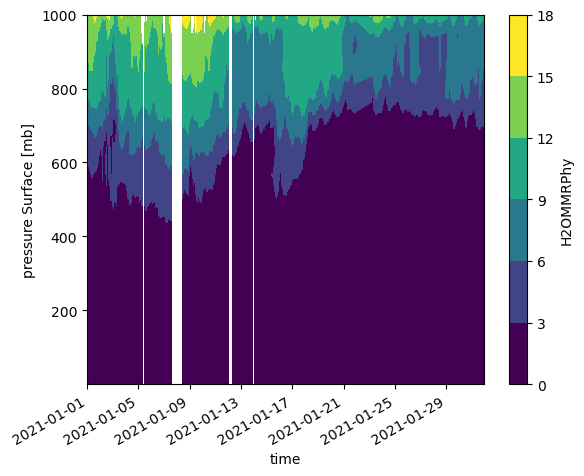

In [19]:
data_transpose.plot.contourf()

# MWR Data analysis